In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [14]:
def dft(xn):
    '''
    Returns DFT for a given signal xn
    '''
    N = len(xn)
    xn = xn.astype(np.complex)
    D = np.ones(N, dtype=np.complex)
    for i in range(1, N):
        n = np.arange(N) * i
        arr = np.exp(-1j * 2 * np.pi * n / N)
        D = np.vstack([D, arr])
        #W = np.append(np.array(W), np.array(arr))
    X = np.matmul(D, xn)
    return X

In [15]:
def idft(X):
    '''
    Returns Inverse DFT for transform X
    '''
    N = len(X)
    D_inv = np.ones(N, dtype=np.complex)
    for i in range(1, N):
        n = np.arange(N) * i
        arr = np.exp(1j * 2 * np.pi * n / N)
        D_inv = np.vstack([D_inv, arr])
    D_inv = D_inv / N
    xn = np.matmul(D_inv, X)
    return xn

In [16]:
def dct(xn):
    '''
    Returns Discrete Cosine Transform (DCT) for a given signal xn
    '''
    N = len(xn)
    dct_mat = np.ones(N, dtype=np.complex)
    for i in range(1, N):
        n = np.arange(np.pi / (2 * N), np.pi, np.pi / N) * i
        arr = np.cos(n)
        dct_mat = np.vstack([dct_mat, arr])
    dct_mat = 2 * dct_mat
    X = np.matmul(dct_mat, xn)
    return X

In [17]:
def idct(X):
    '''
    Returns Inverse DCT for transform X
    '''
    N = len(X)
    idct_mat = np.ones(N, dtype=np.complex)
    idct_mat = idct_mat / 2
    for i in range(1, N):
        n = np.arange(np.pi / (2 * N), np.pi, np.pi / N) * i
        arr = np.cos(n)
        idct_mat = np.vstack([idct_mat, arr])
    idct_mat = idct_mat.T / N
    xn = np.matmul(idct_mat, X)
    return xn

In [18]:
def haar(N):
    '''
    Returns haar matrix of size NxN
    '''
    if N == 2:
        h2 = np.array([[1, 1], [1, -1]])
        return h2
    v = np.log2(N) - 1
    hn2 = haar(N / 2)
    result1 = np.concatenate((hn2, hn2), axis=1)
    matrix1 = (pow(2, v / 2)) * np.identity(int(N / 2))
    result2 = np.concatenate((matrix1, -matrix1), axis = 1)
    return np.concatenate((result1, result2), axis=0)

In [19]:
def ihaar(N):
    '''
    Returns inverse haar matrix of size NxN
    '''
    haar_matrix = haar(N)
    return np.transpose(haar_matrix) / N

In [20]:
def generalised_transform(transform_type, x):
    '''
    Returns the generalized transform of signal x
    0 -> DFT
    1 -> DCT
    2 -> Haar transform
    '''
    N = len(x)
    #print(N)
    if transform_type == 0:
        gtm = dft(x)
        return gtm
    if transform_type == 1:
        gtm = dct(x)
        return gtm
    gtm = haar(N)
    return np.matmul(gtm, x)

In [21]:
def generalised_inverse_transform(transform_type, X):
    '''
    Returns the generalized inverse transform of transform X
    0 -> Inverse DFT
    1 -> Inverse DCT
    2 -> Inverse Haar transform
    '''
    N = len(X)
    #print(N)
    if transform_type == 0:
        igtm = idft(X)
        return igtm
    if transform_type == 1:
        igtm = idct(X)
        return igtm
    igtm = ihaar(N)
    return igtm * X 

In [22]:
def xmdft(X, L, N):
    '''
    Returns the transformed domain signal with lower and higher frequency components set to 0.
    L -> Number of points not set to 0
    '''
    for i in range(int((N + 1 - L) / 2), int((N - 1 + L) / 2) + 1, 1):
        X[i] = 0
    return X

In [23]:
def  xdcthaar(X, L, N):
    for i in range(N - L, N):
        X[i] = 0
    return X

In [24]:
'''def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N'''

'def dot_product(x,y,N):\n    err=x-y\n    errt=np.transpose(err)\n    errt=np.conjugate(errt)\n    \n    return errt*err/N'

In [25]:
def mse(transform_type, x, X, N):
    '''
    Returns mean squared error
    '''
    err = np.array([], dtype = np.float64)
    for l in range(0, N, 1):
        if transform_type == 0:
            Xm = xmdft(X, l, N)
            xm = generalised_inverse_transform(0, Xm)
        if transform_type == 1:
            Xm = xdcthaar(X, l, N)
            xm = generalised_inverse_transform(1, Xm)
        if transform_type == 2:
            Xm = xdcthaar(X, l, N)
            xm = generalised_inverse_transform(2, Xm)
        temp = np.mean(np.square(np.abs(x - xm)))
        err = np.append(err, temp)
    return err

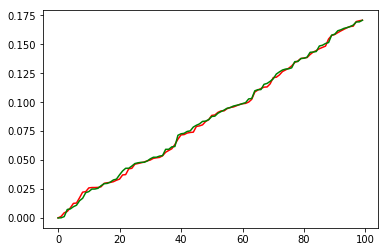

In [28]:
# input sequence generator

length = 100
real = np.random.rand(length)
img = np.random.rand(length)
x = real+1j*img
x = np.array(x)
x = np.transpose(x)
color = ['r', 'g', 'b']
for i in range(2):
    X = generalised_transform(i, x)
    #print(X)
    err = mse(i, x, X, length)
    #break
    #print(err)
    plt.plot(np.arange(0, length, 1), err, color[i])
plt.show()

In [88]:
length = 100
real = np.random.rand(length)
img = np.random.rand(length)
x = real + 1j*img
x = np.array(x)
x = np.transpose(x)
X = generalised_transform(0, x)